<hr/>

# Data Mining  [EN.550.636.02]

03/02/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **Python:** scikit-learn
- **Classification:** Nearest Neighbor
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

<h2><font color="darkblue">Python</font></h2>
<hr/>

### scikit-learn
[Tutorial](http://scikit-learn.org/stable/tutorial/index.html)

#### Datasets
[Reference](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [3]:
from sklearn import datasets

- **Loaders**

In [4]:
digits = datasets.load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
digits.images[0]  # 8 x 8 matrix

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

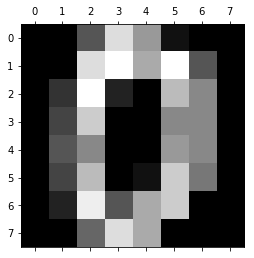

In [7]:
matshow(digits.images[0], cmap='gray');

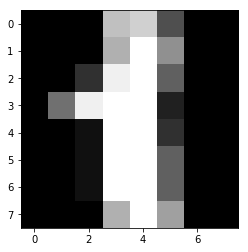

In [8]:
imshow(digits.images[1], cmap='gray');

In [9]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [10]:
# Features
digits.data.shape

(1797, 64)

In [11]:
# Label
digits.target.shape

(1797,)

- **Samples generator**

In [12]:
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=2018)

In [13]:
X.shape

(1000, 10)

In [14]:
y.shape

(1000,)

In [15]:
X, y = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.2, random_state=2018)

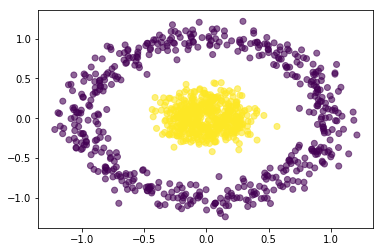

In [16]:
scatter(X[:,0], X[:,1], c=y, alpha=0.6); # alpha: 0.0 transparent through 1.0 opaque

####  Split Training Data and Test Data
[Reference](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Y = np.arange(10)
Y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
X = np.arange(20).reshape(10, 2)
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2018)
print('X_train: \n', X_train)
print('X_test: \n', X_test)
print('Y_train: \n', Y_train)
print('Y_test: \n', Y_test)

X_train: 
 [[16 17]
 [18 19]
 [ 8  9]
 [10 11]
 [ 2  3]
 [ 4  5]
 [12 13]]
X_test: 
 [[ 0  1]
 [ 6  7]
 [14 15]]
Y_train: 
 [8 9 4 5 1 2 6]
Y_test: 
 [0 3 7]


In [21]:
# If you don't want to shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2018, shuffle=False)
print('X_train: \n', X_train)
print('X_test: \n', X_test)
print('Y_train: \n', Y_train)
print('Y_test: \n', Y_test)

X_train: 
 [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]
X_test: 
 [[14 15]
 [16 17]
 [18 19]]
Y_train: 
 [0 1 2 3 4 5 6]
Y_test: 
 [7 8 9]


#### Cross-Validation
[Reference](http://scikit-learn.org/stable/modules/cross_validation.html)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
wine = datasets.load_wine()

In [24]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [25]:
# Features
wine.data.shape

(178, 13)

In [26]:
# Label
wine.target.shape

(178,)

In [27]:
# How many class and how many observation in each class
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [28]:
from sklearn import neighbors

In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
cvscores = cross_val_score(estimator=knn, X=wine.data, y=wine.target, cv=10)
print(cvscores)

[ 0.68421053  0.55555556  0.72222222  0.66666667  0.66666667  0.66666667
  0.72222222  0.77777778  0.88235294  0.875     ]


In [30]:
mean(cvscores)

0.72193412452700367

In [31]:
# Alternatively

# Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import KFold

# The folds are made by preserving the percentage of samples for each class
from sklearn.model_selection import StratifiedKFold 

In [32]:
wine.data.shape

(178, 13)

In [33]:
wine.target.shape

(178,)

In [34]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=2018) # random_state used when shuffle == True.
for fold1_index, fold2_index in skf.split(wine.data, wine.target):
    print('Fold1:', fold1_index)
    print('Fold2:', fold2_index)
    print('\n')

Fold1: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Fold2: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153]


Fold1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  

In [35]:
# The distribution of each class in each folds
y_fold1 = wine.target[fold1_index]
y_fold2 = wine.target[fold2_index]
print('Fold1:')
print(np.unique(y_fold1, return_counts=True))
print('Fold2:')
print(np.unique(y_fold2, return_counts=True))

Fold1:
(array([0, 1, 2]), array([30, 36, 24]))
Fold2:
(array([0, 1, 2]), array([29, 35, 24]))


In [36]:
kf = KFold(n_splits=2, shuffle=True, random_state=2018) # random_state used when shuffle == True.
for fold1_index, fold2_index in kf.split(wine.data, wine.target):
    print('Fold1:', fold1_index)
    print('Fold2:', fold2_index)
    print('\n')

Fold1: [  0   4   6   9  16  19  22  25  26  27  29  31  34  38  40  42  43  44
  45  46  47  49  50  55  59  60  61  65  67  70  71  72  73  74  75  76
  77  79  83  86  87  88  93  96  97  98  99 100 102 103 104 105 109 113
 114 117 119 120 122 123 126 127 128 130 134 135 137 141 142 145 147 148
 149 150 151 152 153 154 156 157 159 160 163 164 170 171 172 175 177]
Fold2: [  1   2   3   5   7   8  10  11  12  13  14  15  17  18  20  21  23  24
  28  30  32  33  35  36  37  39  41  48  51  52  53  54  56  57  58  62
  63  64  66  68  69  78  80  81  82  84  85  89  90  91  92  94  95 101
 106 107 108 110 111 112 115 116 118 121 124 125 129 131 132 133 136 138
 139 140 143 144 146 155 158 161 162 165 166 167 168 169 173 174 176]


Fold1: [  1   2   3   5   7   8  10  11  12  13  14  15  17  18  20  21  23  24
  28  30  32  33  35  36  37  39  41  48  51  52  53  54  56  57  58  62
  63  64  66  68  69  78  80  81  82  84  85  89  90  91  92  94  95 101
 106 107 108 110 111 112 115 116 1

In [37]:
# The distribution of each class in each folds
y_fold1 = wine.target[fold1_index]
y_fold2 = wine.target[fold2_index]
print('Fold1:')
print(np.unique(y_fold1, return_counts=True))
print('Fold2:')
print(np.unique(y_fold2, return_counts=True))

Fold1:
(array([0, 1, 2]), array([35, 32, 22]))
Fold2:
(array([0, 1, 2]), array([24, 39, 26]))


<font color="red">**NOTE**: Be careful of unbalanced when split the data</font>

<h2><font color="darkblue">Model</font></h2>
<hr/>

### Preliminaries

#### Evaluation 
[Reference](http://scikit-learn.org/stable/modules/model_evaluation.html)

<img src='files/p1.png' width=1000 align=center>

<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/Precision_and_recall)</p>

> $ \displaystyle Precision = \frac{True \  Positive}{True \  Positive + False \  Positive} = \frac{TP}{TP + FP} $
>
> $ \displaystyle Reacll = \frac{True \  Positive}{True \  Positive + False \  Negative} = \frac{TP}{TP + FN} $
>
> $ \displaystyle F_1 = 2 \cdot \frac{1}{\frac{1}{Precision}+\frac{1}{Reacll}} = 2 \cdot \frac{Precision \cdot Reacll}{Precision + Reacll} $
>
> $ \displaystyle Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

#### Distance

> $ \displaystyle \lVert X - Y \rVert_1 = \sum_{i=1}^{n} \lvert x_i - y_i \rvert $
>
> $ \displaystyle \lVert X - Y \rVert_2 = \left( \sum_{i=1}^{n} \lvert x_i - y_i \rvert^2 \right)^{1/2} $
>
> $ \displaystyle \lVert X - Y \rVert_p = \left( \sum_{i=1}^{n} \lvert x_i - y_i \rvert^p \right)^{1/p} \qquad 1 \le p < \infty $
>
> $ \displaystyle \lVert X - Y \rVert_\infty = \max_{i=1, \cdots, n} \lvert x_i - y_i \rvert $

### Nearest Neighbor
[Reference](http://scikit-learn.org/stable/modules/neighbors.html)

#### Procedure of Nearest Neighbor

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the nearest neighbor (minimal distance)

- Classify the unknown data point based on the label of the nearest neighbor

In [38]:
import datetime as dt

In [39]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [51]:
# Example from Lecture
start = dt.datetime.now()

y_pred = -1 * np.ones(y.size)

# loop on query set
for i in arange(y.size): 
    
    d2min = 1e99                   # something large (initial)
    
    # loop on training set
    for j in arange(y.size):
        if i != j:                 # leave itself out
            d = X[i,:] - X[j,:]    # diff vector between data point i and data point j
            d2 = d.dot(d)          # calculate distance
            if d2 < d2min:         # check if data point j is closer to data point i than the previous data points
                d2min = d2         # if data point j is closer, set its' distance to be the new threshold
                y_pred[i] = y[j]   # use the label of the closest data point as the prediction
                
print('Number of mislabeled points out of a total %d points: %d' % (y.size, (y!=y_pred).sum()))
print('Elapsed time', dt.datetime.now() - start)

Number of mislabeled points out of a total 150 points: 6
Elapsed time 0:00:00.117087


In [41]:
from scipy.spatial import distance_matrix

In [49]:
# Alternatively
start = dt.datetime.now()

# Calculate the distance matrix (150 x 150)
dist = distance_matrix(X, X, p=2)            # p: which Minkowski p-norm to use
np.fill_diagonal(dist, 1e99)                 # leave itself out

# Find the nearest neighbor
nn = np.argmin(dist, axis=1)

# Use the label of the closest data point as the prediction
y_pred = y[nn]

print('Number of mislabeled points out of a total %d points: %d' % (y.size, (y!=y_pred).sum()))
print('Elapsed time', dt.datetime.now() - start)

Number of mislabeled points out of a total 150 points: 6
Elapsed time 0:00:00.002108


#### Procedure of KNN

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the $ k $ nearest neighbor ($ k $ minimal distance)

- Classify the unknown data point based on the label of the $ k $ nearest neighbor (vote)
> Uniform: All points in each neighborhood are weighted equally
>
> Distance: Weight points by the inverse of their distance
>
> Self-defined

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [45]:
# Toy Example
knn = pd.DataFrame()

for k in range(1,11):
    
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)   # p: which Minkowski p-norm to use
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2) 
    
    cvscores1 = cross_val_score(model1, X, y, cv=10)
    cvscores2 = cross_val_score(model2, X, y, cv=10)
    
    # Save the result
    knn = knn.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn = knn.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn.index = arange(1,21)

In [46]:
knn

,k,weights,10-fold CV score
1,1,uniform,0.960000
2,1,distance,0.960000
3,2,uniform,0.953333
4,2,distance,0.960000
5,3,uniform,0.966667
6,3,distance,0.966667
7,4,uniform,0.966667
8,4,distance,0.966667
9,5,uniform,0.966667
10,5,distance,0.966667


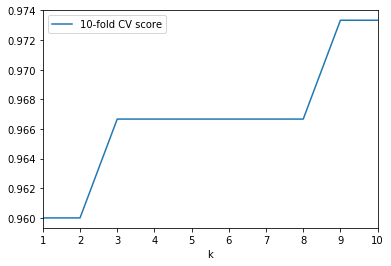

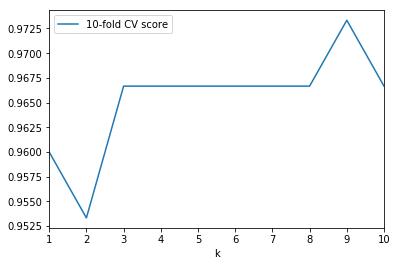

In [47]:
knn.groupby('weights').plot(x='k');